In [1]:
import pandas as pd

In [2]:
#importing the dataset
df=pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
import seaborn as sns
import numpy as np

# **Univariate Analaysis**

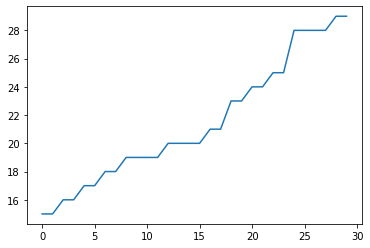

In [7]:
df.head(30).AnnualIncome.plot()

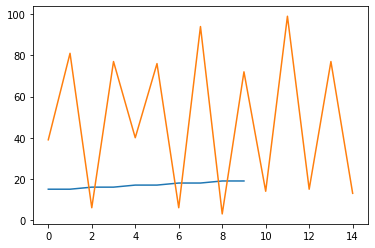

In [8]:
df.head(10).AnnualIncome.plot()
df.head(15).SpendingScore.plot()

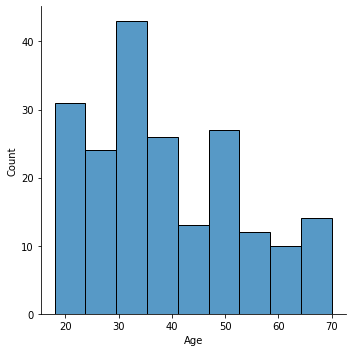

In [9]:
sns.displot(df.Age)

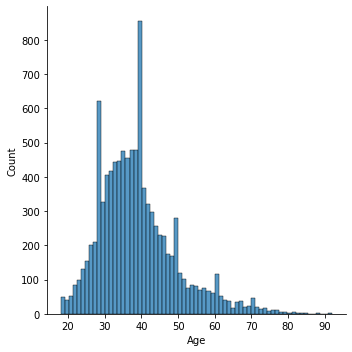

In [ ]:
sns.displot(df.Age)

# **Bi-Variate Analysis**

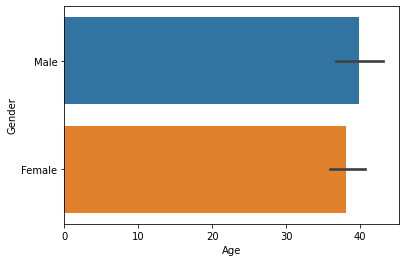

In [10]:
sns.barplot(x='Age',y='Gender',data=df)


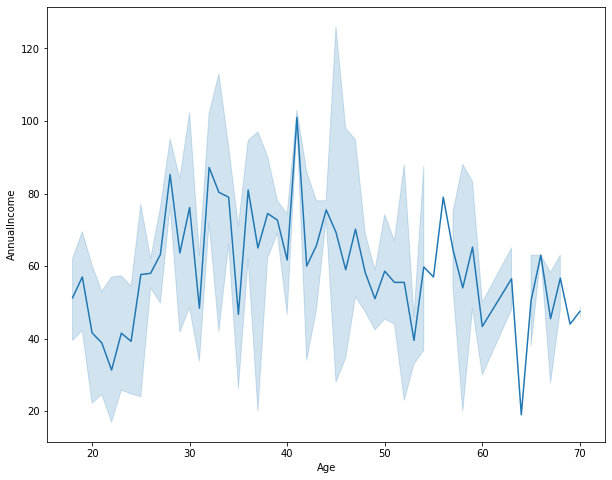

In [11]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=df["Age"], y=df["AnnualIncome"]);
plt.xlabel('Age');
plt.ylabel('AnnualIncome');

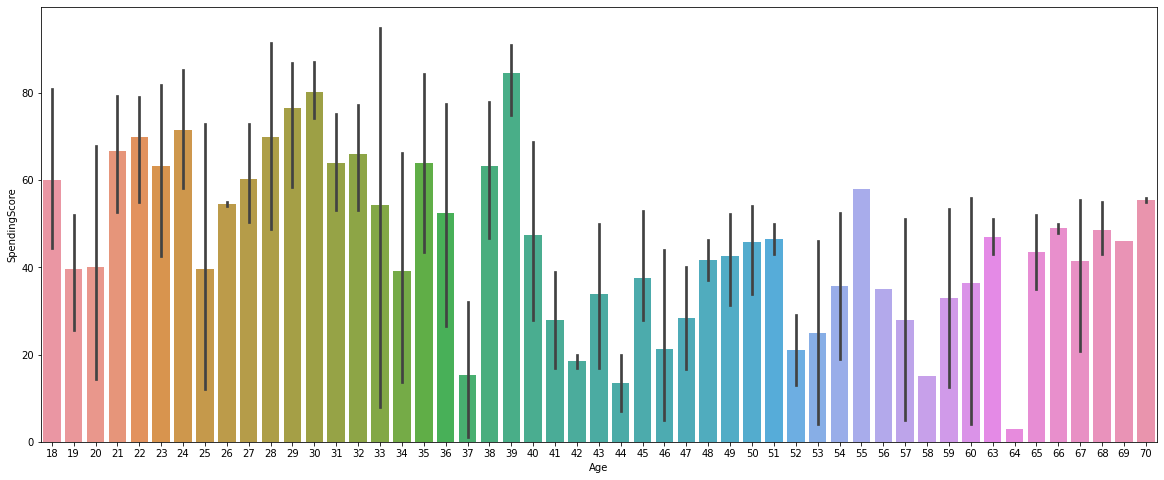

In [15]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Age',y='SpendingScore',data=df)

# **Multi-Variate Analysis**

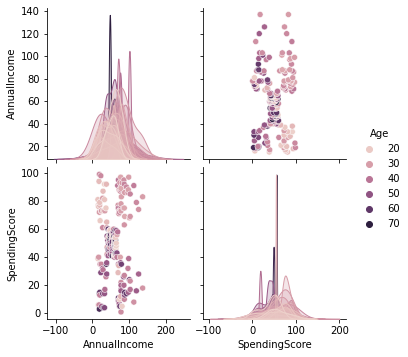

In [18]:
sns.pairplot(data=df[["AnnualIncome","Age","SpendingScore","Gender"]],hue="Age")

# **Descriptive Statistics**

In [19]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
print ("Mean: ",df['Age'].mean())
print ("Mode: ",df['AnnualIncome'].mode())
print ("Median: ",df['SpendingScore'].median())

Mean:  38.85
Mode:  0    54
1    78
dtype: int64
Median:  50.0


# **Handling the missing Null Values**

In [21]:
df.shape

(200, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['AnnualIncome'].fillna(df['AnnualIncome'].median(),inplace=True)
df['SpendingScore'].fillna(df['SpendingScore'].mode(),inplace=True)

In [24]:
df.isnull().any()

CustomerID       False
Gender           False
Age              False
AnnualIncome     False
SpendingScore    False
dtype: bool

# **Find the Outliers and remove the outliers**

### **Remove Outlier Using IQR**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


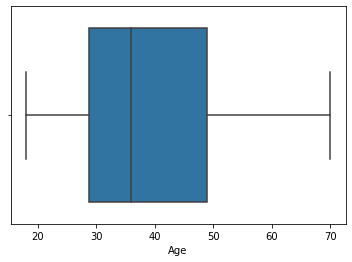

In [25]:
sns.boxplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


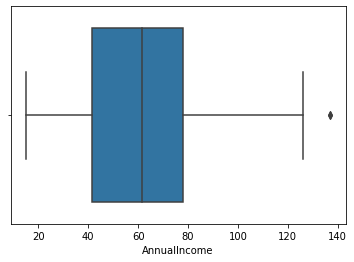

In [26]:
sns.boxplot(df.AnnualIncome)

In [27]:
q1=df.AnnualIncome.quantile(0.25)
q3=df.AnnualIncome.quantile(0.75)

In [28]:
IQR=q3-q1

In [29]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [30]:
df=df[df.AnnualIncome<upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


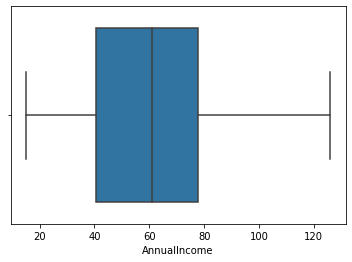

In [31]:
sns.boxplot(df.AnnualIncome)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


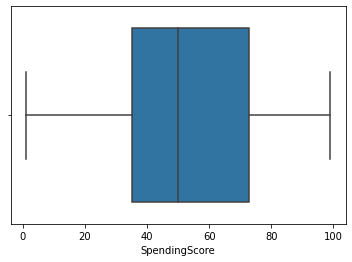

In [33]:
sns.boxplot(df.SpendingScore)

# **Perform Encoding on Categorical column**
###**Label Encoding**

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [38]:
df.Gender=le.fit_transform(df.Gender)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
193,194,0,38,113,91
194,195,0,47,120,16
195,196,0,35,120,79
196,197,0,45,126,28


# **Scaling the Independent Variable**

In [39]:
from sklearn.preprocessing import scale

In [40]:
X=df
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,-1.723325,1.141195,-1.425414,-1.779171,-0.435989
1,-1.705829,1.141195,-1.282367,-1.779171,1.199413
2,-1.688334,-0.876275,-1.353890,-1.739447,-1.720949
3,-1.670838,-0.876275,-1.139319,-1.739447,1.043661
4,-1.653342,-0.876275,-0.567131,-1.699723,-0.397051


# **Perform the clustering Algorithm**

In [42]:
from sklearn.cluster import KMeans

In [43]:
df1=df[["CustomerID","Gender","Age","AnnualIncome","SpendingScore"]]
X=df1[["AnnualIncome","SpendingScore"]]

In [44]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

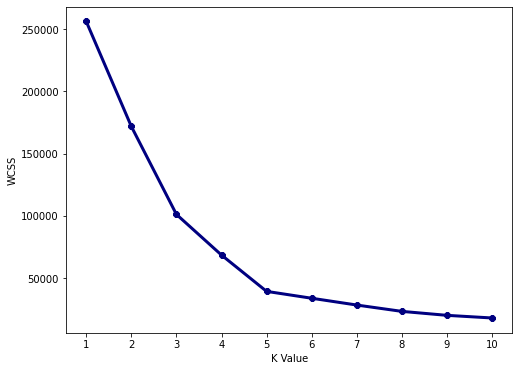

In [51]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=3, color="navy", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


### **selecting  4 clusters**

In [53]:
model=KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [54]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0],
      dtype=int32)

In [55]:
mb=pd.Series(model.labels_)

In [57]:
df.head(5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# **Add the cluster data with the primary dataset**

In [59]:
df['clust']=mb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,clust
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [62]:
df.tail()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,clust
193,194,0,38,113,91,0
194,195,0,47,120,16,2
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0


# **Split the data into dependent and independent variable**

In [63]:
#Independent variable
df_main=df
X=df_main.drop(columns=['clust'],axis=1)
X.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [64]:
Y=df_main['clust']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: clust, dtype: int32

# **Scaling the Independent Variable**

In [65]:
from sklearn.preprocessing import scale

In [66]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,-1.723325,1.141195,-1.425414,-1.779171,-0.435989
1,-1.705829,1.141195,-1.282367,-1.779171,1.199413
2,-1.688334,-0.876275,-1.353890,-1.739447,-1.720949
3,-1.670838,-0.876275,-1.139319,-1.739447,1.043661
4,-1.653342,-0.876275,-0.567131,-1.699723,-0.397051


# **Split Data into trainig and testing**

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.3,random_state=0)

In [68]:
X_train.shape

(138, 5)

In [69]:
y_train.shape

(138,)

In [70]:
X_test.shape

(60, 5)

In [71]:
y_test.shape

(60,)

# **Training and Testing the Model**

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.21920032238195253, 0.19478659026425083)

In [73]:
model = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=40)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.8860519096855877)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf=RandomForestClassifier()

In [76]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
#prediction
pred=rf.predict(X_test)

# **Measure the performance using Evaluvation Metrics**

In [79]:
# Accuracy of DI model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


0.95

In [80]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[13,  0,  0,  1],
       [ 0, 19,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  1,  1, 16]])